# Imports

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold, cross_val_score

# Onehot encoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import (
    accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
    recall_score, precision_score, f1_score,
    make_scorer, fbeta_score, cohen_kappa_score
)


import optuna
from sklearn.svm import SVC
from sklearn.metrics import recall_score, accuracy_score
import os

import xgboost as xgb

In [30]:
train0 = pd.read_csv('/Users/merlesteffen/Documents/GitHub/MushroomClassification/Data/train.csv')
test0 = pd.read_csv('/Users/merlesteffen/Documents/GitHub/MushroomClassification/Data/test.csv')
train1=train0.copy()

In [31]:
train_id = train0.pop('Id')
test_id = test0.pop('Id')
target = train0.pop('poisonous')

- Cleaning
- Feature Engineering
- Feature Transformations
- Encoding
- Scaling
- Target Transformations
- Model Selection
- Hyperparameter Opitmization
- Ensembling
- Feature Selection

# Split Data

In [32]:
X = train0.copy()
y = target.copy()
data1 = pd.concat([X,y], axis=1)
data1

,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population,poisonous
0,k,e,False,w,w,v,1
1,f,e,True,p,w,y,0
2,b,w,False,w,w,s,0
3,k,g,False,w,w,n,0
4,f,n,True,p,g,v,0
...,...,...,...,...,...,...,...
6494,f,g,False,b,b,v,1
6495,k,e,False,p,p,v,1
6496,f,g,False,n,b,y,1
6497,f,n,True,w,w,s,0


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Encode

In [34]:
cat_pipe = make_pipeline(
    OneHotEncoder(sparse=False, handle_unknown='ignore'),
    StandardScaler()
)

In [35]:
cat_pipe.fit(X_train)

/Users/merlesteffen/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False,
                               sparse_output=False)),
                ('standardscaler', StandardScaler())])

In [36]:
# Transform the original data using the pipeline
X_train= cat_pipe.transform(X_train)
X_test = cat_pipe.transform(X_test)
y = LabelEncoder().fit_transform(y)


# Model Selection

In [9]:
# Linear Models
log_model = LogisticRegression()
ridge_classifier = RidgeClassifier()

# Support Vector Machines
linear_svc = LinearSVC()
svm_rbf = SVC(kernel='rbf')
svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly')

# Tree-based Models
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
extra_trees = ExtraTreesClassifier()

# Neural Networks
nn_model = MLPClassifier(hidden_layer_sizes=(128, 128))

# Bayesian Models
gaussian_nb = GaussianNB()

# Nearest Neighbors
k_neighbors = KNeighborsClassifier()

# Discriminant Analysis
quadratic_discriminant = QuadraticDiscriminantAnalysis()

# Ensemble - For the sake of example, let's consider a Voting Classifier with two models: logistic regression and SVM with RBF kernel.
# Of course, you can replace these models with any other classifiers or add more classifiers to the ensemble.
voting_classifier = VotingClassifier(estimators=[('lr', log_model), ('svm_rbf', svm_rbf)], voting='hard')

xgb_cl = xgb.XGBClassifier()
import lightgbm as lgb

# Create a LightGBM classifier instance
clf = lgb.LGBMClassifier()

# Now, all these models are initialized and can be trained using their respective 'fit' methods.

In [10]:
models = [log_model, ridge_classifier, linear_svc, svm_rbf, svm_linear, svm_poly, decision_tree, random_forest, gradient_boosting, extra_trees, nn_model, gaussian_nb, k_neighbors, quadratic_discriminant, voting_classifier, xgb_cl, clf]

# Train

In [11]:
np.sum(y) / len(y)

0.4857670410832436

/Users/merlesteffen/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/merlesteffen/Library/Python/3.9/lib/python/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


[LightGBM] [Info] Number of positive: 2510, number of negative: 2689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 111
[LightGBM] [Info] Number of data points in the train set: 5199, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.482785 -> initscore=-0.068887
[LightGBM] [Info] Start training from score -0.068887
---LogisticRegression FN: 75
LogisticRegression()


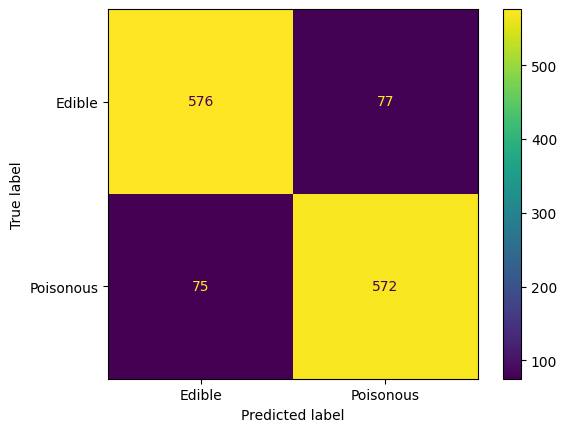

---RidgeClassifier FN: 66
RidgeClassifier()


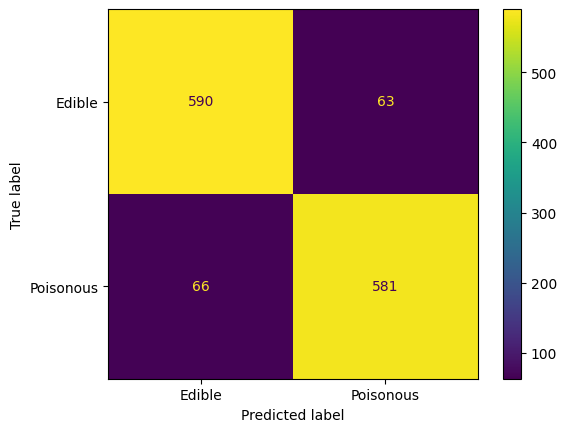

---LinearSVC FN: 75
LinearSVC()


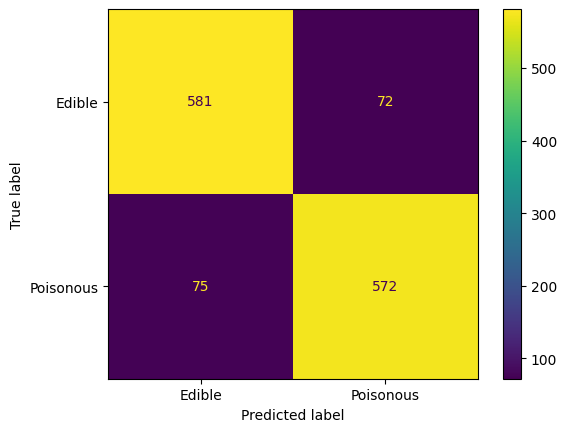

---SVC FN: 16
SVC()


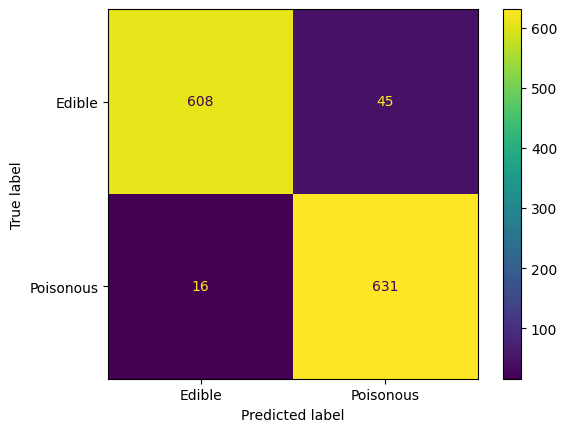

---SVC FN: 67
SVC(kernel='linear')


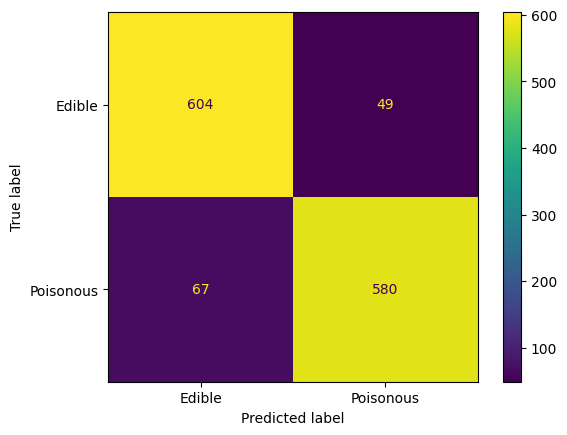

---SVC FN: 19
SVC(kernel='poly')


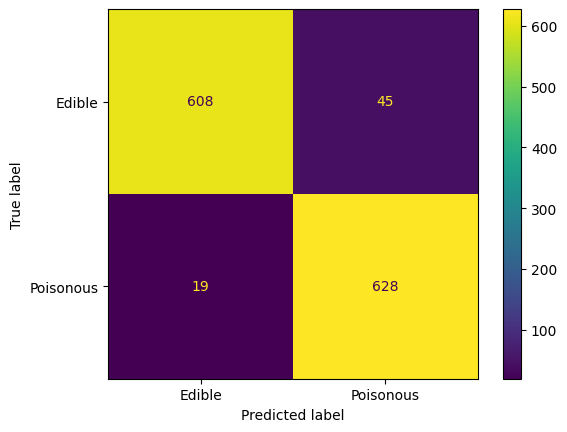

---DecisionTreeClassifier FN: 21
DecisionTreeClassifier()


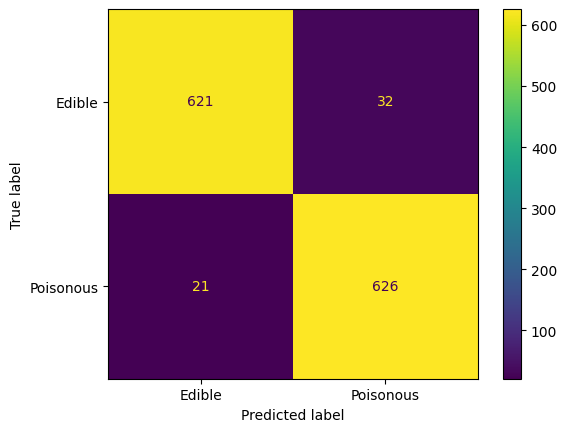

---RandomForestClassifier FN: 21
RandomForestClassifier()


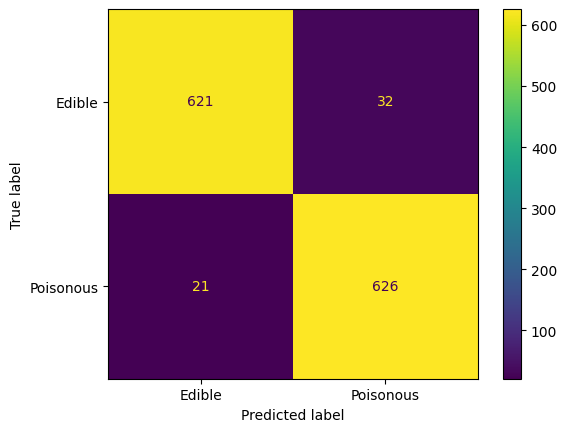

---GradientBoostingClassifier FN: 51
GradientBoostingClassifier()


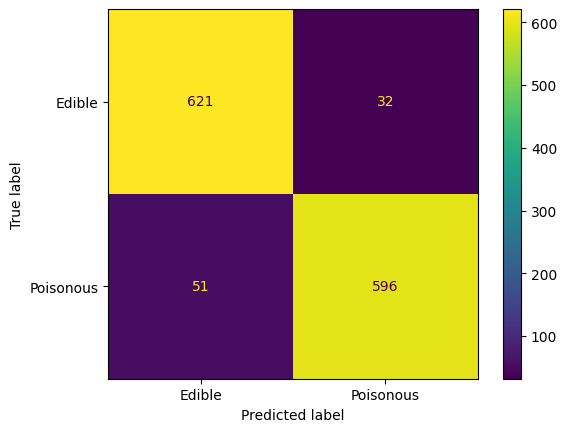

---ExtraTreesClassifier FN: 21
ExtraTreesClassifier()


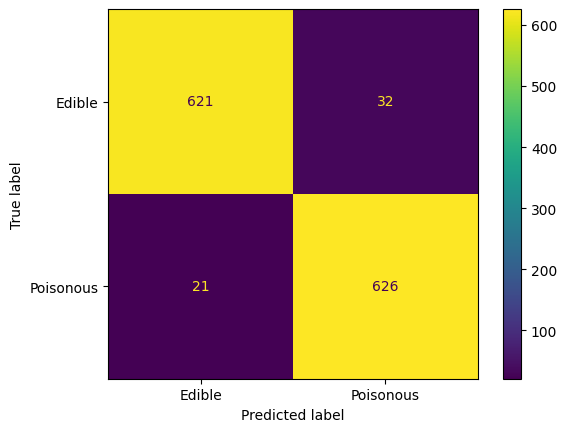

---MLPClassifier FN: 14
MLPClassifier(hidden_layer_sizes=(128, 128))


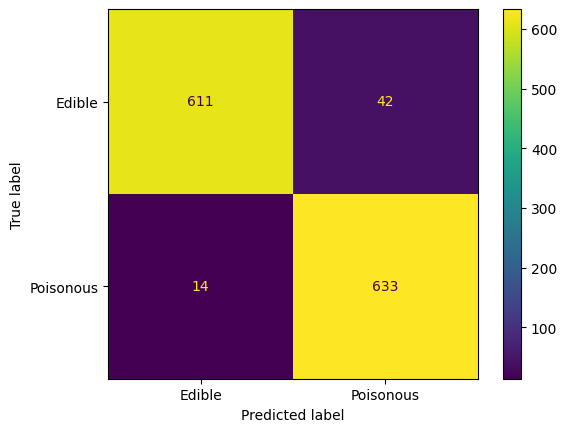

---GaussianNB FN: 3
GaussianNB()


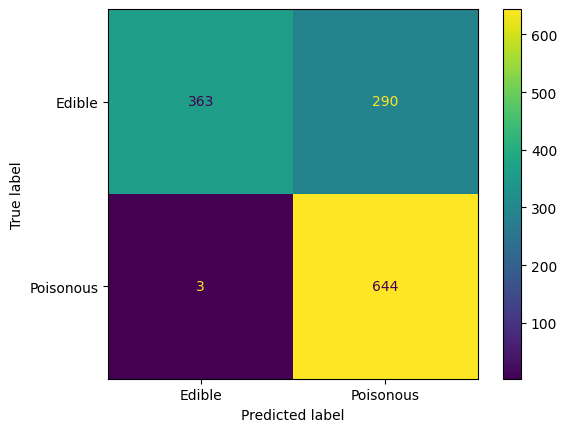

---KNeighborsClassifier FN: 32
KNeighborsClassifier()


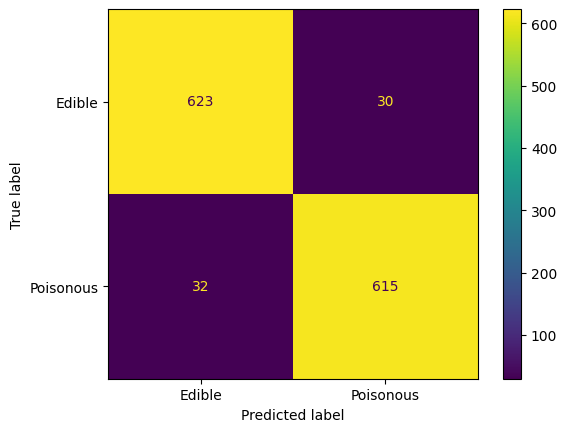

---QuadraticDiscriminantAnalysis FN: 11
QuadraticDiscriminantAnalysis()


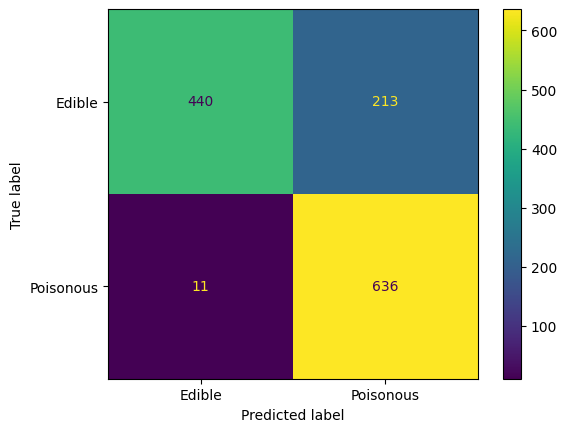

---VotingClassifier FN: 87
VotingClassifier(estimators=[('lr', LogisticRegression()), ('svm_rbf', SVC())])


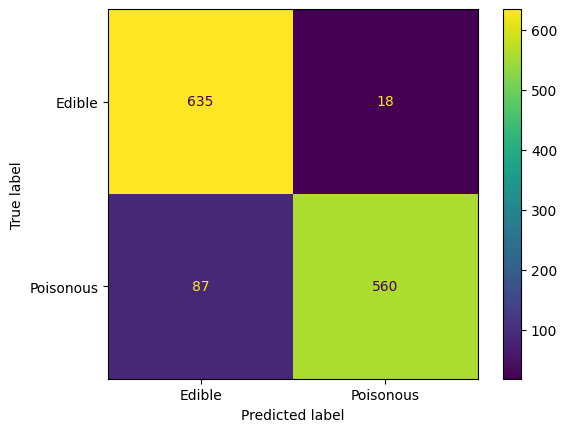

---XGBClassifier FN: 23
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


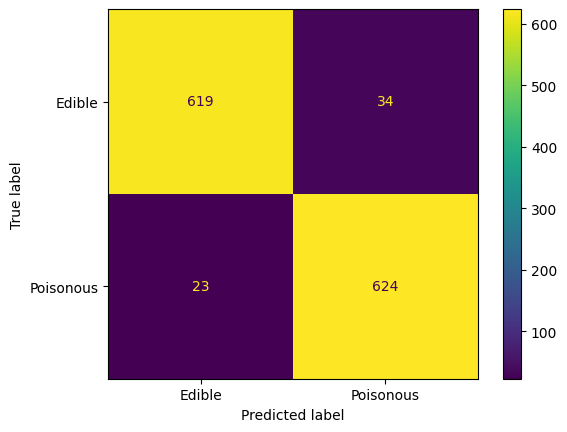

---LGBMClassifier FN: 23
LGBMClassifier()


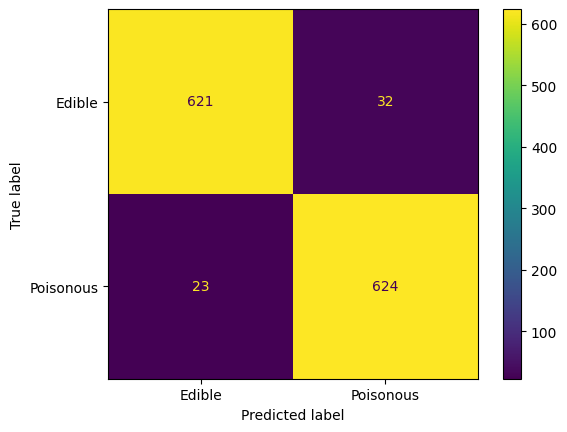

In [12]:
# Define a function to compute false negatives
def false_negatives(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fn

# Train all models
for model in models:
    model.fit(X_train, y_train)

# Evaluate all models
for model in models:
    y_pred_model = model.predict(X_test)
    fn = false_negatives(y_test, y_pred_model)
    print(f"---{type(model).__name__} FN: {fn}")
    print(model)
    cm = confusion_matrix(y_test, y_pred_model)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=['Edible', 'Poisonous'])
    disp.plot()

    plt.show()


# Hypertuning Best Models

In [38]:
# RandomForestClassifier(n_estimators=500, random_state=123)

import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import recall_score, accuracy_score

def objective(trial):
    # Define the hyperparameter search space
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 32, log=True),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 16),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 16),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
    }

    model = RandomForestClassifier(**param, random_state=0)
    model.fit(X_train, y_train)

    # Predict continuous values
    predictions = model.predict(X_test)

    return 1 - recall_score(y_test, predictions)

# Create a study object and specify the direction is "minimize".
study = optuna.create_study(direction="minimize")

# Optimize the study
study.optimize(objective, n_trials=100)

xgb_param = study.best_params
# Results
print(f"The best parameters for RandomForestRegressor are {study.best_params} with a score of {1 - study.best_value}")


[I 2023-10-09 16:51:15,817] A new study created in memory with name: no-name-04c18354-5311-48f6-9d21-2ead14e8b991
[I 2023-10-09 16:51:16,084] Trial 0 finished with value: 0.20865533230293665 and parameters: {'n_estimators': 265, 'max_depth': 2, 'min_samples_split': 8, 'min_samples_leaf': 11, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.20865533230293665.
[I 2023-10-09 16:51:16,769] Trial 1 finished with value: 0.03245749613601234 and parameters: {'n_estimators': 383, 'max_depth': 22, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.03245749613601234.
[I 2023-10-09 16:51:17,920] Trial 2 finished with value: 0.1205564142194745 and parameters: {'n_estimators': 810, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 15, 'max_features': 'log2', 'bootstrap': False}. Best is trial 1 with value: 0.03245749613601234.
[I 2023-10-09 16:51:18,131] Trial 3 finished with value: 0.208655332

The best parameters for RandomForestRegressor are {'n_estimators': 383, 'max_depth': 22, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False} with a score of 0.9675425038639877


In [22]:
import optuna
from sklearn.metrics import recall_score, accuracy_score
from sklearn.neural_network import MLPClassifier

def objective(trial):
    # Define search space for hyperparameters
    param = {
        'hidden_layer_sizes': trial.suggest_categorical('hidden_layer_sizes', [(30,30), (50,), (100,), (50, 50), (100, 100)]),
        'activation': trial.suggest_categorical('activation', ['identity', 'logistic', 'tanh', 'relu']),
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'sgd', 'adam']),
        'alpha': trial.suggest_loguniform('alpha', 1e-5, 1e-1),
        'batch_size': trial.suggest_categorical('batch_size', ['auto', 64, 128, 256]),
        'learning_rate': trial.suggest_categorical('learning_rate', ['constant', 'invscaling', 'adaptive']),
        'learning_rate_init': trial.suggest_loguniform('learning_rate_init', 1e-4, 1e-1),
        'max_iter': trial.suggest_int('max_iter', 100, 2000, step=100),
        'early_stopping': trial.suggest_categorical('early_stopping', [True, False])
    }

    # Adjusting tol based on solver
    if param['solver'] != 'adam':
        param['tol'] = trial.suggest_loguniform('tol', 1e-5, 1e-2)

    model = MLPClassifier(**param, random_state=0)
    model.fit(X_train, y_train)

    # Predict class probabilities
    probabilities = model.predict_proba(X_test)[:, 1]

    # Search for the best threshold
    best_recall = 0
    best_threshold = 0.5
    for threshold in np.arange(0, 1.01, 0.01):  # Search from 0 to 1 in steps of 0.01
        predictions_adjusted = [1 if prob > threshold else 0 for prob in probabilities]
        recall = recall_score(y_test, predictions_adjusted)
        if recall > best_recall:
            best_recall = recall
            best_threshold = threshold

    # Return the negative recall to minimize
    return 1 - best_recall

# Create a study object and specify the direction is "minimize".
study = optuna.create_study(direction="minimize")

# Implementing the early stopping using callbacks
def stop_after_n_consecutive_failures(study, trial):
    n_consecutive_failures = 10
    if len(study.trials) < n_consecutive_failures + 1:
        return
    if study.best_value != min([t.value for t in study.trials[-n_consecutive_failures:]]):
        raise optuna.exceptions.OptunaError("Stopped optimization as no improvement in last 10 trials.")

study.optimize(objective, n_trials=100, callbacks=[stop_after_n_consecutive_failures])

# Results
best_param_mlp = study.best_params
print(f"The best parameters for MLPClassifier are {study.best_params} with a score of {1 - study.best_value}")


[I 2023-10-09 15:52:32,445] A new study created in memory with name: no-name-fd3624f5-d83f-4628-bb6d-ea831a26ef9f
/Users/merlesteffen/Library/Python/3.9/lib/python/site-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (30, 30) which is of type tuple.
  warnings.warn(message)
/Users/merlesteffen/Library/Python/3.9/lib/python/site-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
/Users/merlesteffen/Library/Python/3.9/lib/python/site-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/Users/merlesteffe

The best parameters for MLPClassifier are {'hidden_layer_sizes': (50,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0039983026106050435, 'batch_size': 128, 'learning_rate': 'adaptive', 'learning_rate_init': 0.00025696701812899785, 'max_iter': 1700, 'early_stopping': True} with a score of 1.0


In [ ]:
# MLP Model

def objective(trial):
    # Define search space for hyperparameters
    param = {
        'hidden_layer_sizes': trial.suggest_categorical('hidden_layer_sizes', [(30,30), (50,), (100,), (50, 50), (100, 100)]),
        'activation': trial.suggest_categorical('activation', ['identity', 'logistic', 'tanh', 'relu']),
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'sgd', 'adam']),
        'alpha': trial.suggest_loguniform('alpha', 1e-5, 1e-1),
        'batch_size': trial.suggest_categorical('batch_size', ['auto', 64, 128, 256]),
        'learning_rate': trial.suggest_categorical('learning_rate', ['constant', 'invscaling', 'adaptive']),
        'learning_rate_init': trial.suggest_loguniform('learning_rate_init', 1e-4, 1e-1),
        'max_iter': trial.suggest_int('max_iter', 100, 2000, step=100)

    }

    # Adjusting tol based on solver
    if param['solver'] != 'adam':
        param['tol'] = trial.suggest_loguniform('tol', 1e-5, 1e-2)

    model = MLPClassifier(**param, random_state=0)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return 1 - recall_score(y_test, predictions)  # Optuna aims to minimize the objective

# Create a study object and specify the direction is "minimize".
study = optuna.create_study(direction="minimize")

# Optimize the study, the objective function is passed in as the first argument.
study.optimize(objective, n_trials=100, n_jobs=n_jobs)

# Results
best_param_mlppp = study.best_params
print(f"The best parameters for MLPClassifier are {study.best_params} with a score of {1 - study.best_value}")


[I 2023-10-09 15:16:28,296] A new study created in memory with name: no-name-993f83eb-26ec-400f-946c-b07ced3b6170
[W 2023-10-09 15:16:28,475] Trial 0 failed with parameters: {'hidden_layer_sizes': (100,), 'activation': 'identity', 'solver': 'lbfgs', 'alpha': 0.009306542369961405, 'batch_size': 64, 'learning_rate': 'adaptive', 'learning_rate_init': 0.00043666926314796283, 'max_iter': 1500} because of the following error: TypeError("suggest_categorical() missing 1 required positional argument: 'choices'").
Traceback (most recent call last):
  File "/Users/merlesteffen/Library/Python/3.9/lib/python/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/var/folders/7h/lk9jxn256x10l_m01pz7khdw0000gn/T/ipykernel_44836/178189809.py", line 14, in objective
    'early_stopping' : trial.suggest_categorical(True)
TypeError: suggest_categorical() missing 1 required positional argument: 'choices'
[W 2023-10-09 15:16:28,489] Trial 0 failed with v

TypeError: suggest_categorical() missing 1 required positional argument: 'choices'

[I 2023-10-09 15:16:33,485] Trial 17 finished with value: 0.021638330757341562 and parameters: {'hidden_layer_sizes': (100, 100), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0002199985921505089, 'batch_size': 128, 'learning_rate': 'adaptive', 'learning_rate_init': 0.036944258393045985, 'max_iter': 1400}. Best is trial 6 with value: 0.021638330757341562.


## Final model with parameters

In [ ]:
# find threshold


/Users/merlesteffen/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:160: UserWarning: [17:00:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Adjusted Recall: 1.0
Adjusted Accuracy: 0.9438461538461539


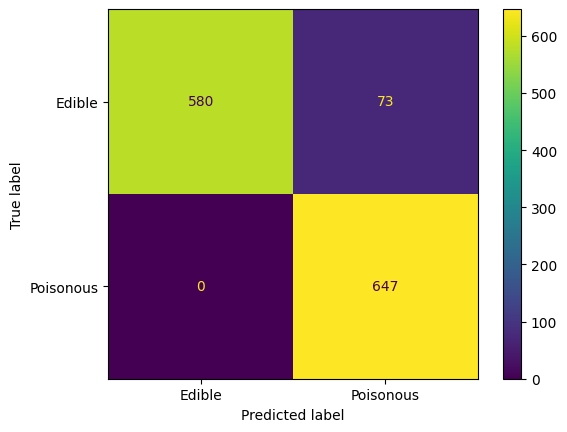

In [53]:
#XGB Classifier
param = xgb_param

model = xgb.XGBClassifier(**param, random_state=0)
model.fit(X_train, y_train)


probabilities = model.predict_proba(X_test)[:, 1]

# 2. Decide on a threshold
threshold = 1 - 0.942647  # You can adjust this value as needed

# 3. Apply the threshold
predictions_adjusted = [1 if prob > threshold else 0 for prob in probabilities]

# Now, evaluate the model using these adjusted predictions
recall_adjusted = recall_score(y_test, predictions_adjusted)
print(f'Adjusted Recall: {recall_adjusted}')

accuracy_adjusted = accuracy_score(y_test, predictions_adjusted)
print(f'Adjusted Accuracy: {accuracy_adjusted}')


cm = confusion_matrix(y_test, predictions_adjusted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=['Edible', 'Poisonous'])
disp.plot()

plt.show()

In [42]:
from sklearn.metrics import roc_curve

rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, probabilities)

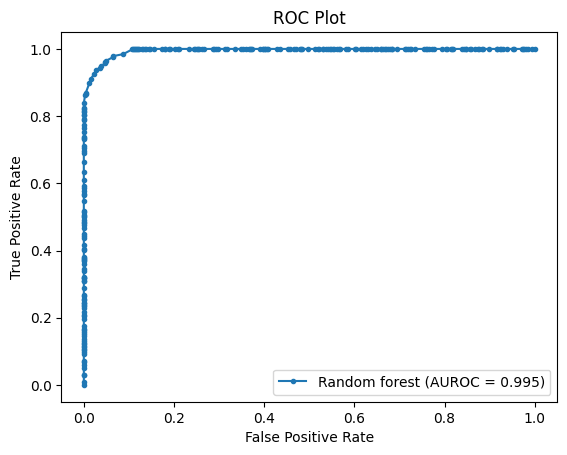

In [43]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test,probabilities)

plt.plot(rf_fpr, rf_tpr, marker='.', label='Random forest (AUROC = %0.3f)' % rf_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()

In [44]:
win_threshold = pd.DataFrame({'fpr':rf_fpr,'tpr':rf_tpr,'threshold':rf_threshold})
win_threshold

,fpr,tpr,threshold
0,0.000000,0.000000,1.999958
1,0.000000,0.009274,0.999958
2,0.000000,0.029366,0.999957
3,0.000000,0.030912,0.999956
4,0.000000,0.049459,0.999956
...,...,...,...
247,0.977029,1.000000,0.000014
248,0.981623,1.000000,0.000013
249,0.984686,1.000000,0.000012
250,0.993874,1.000000,0.000010


In [51]:
win_threshold[80:100]

,fpr,tpr,threshold
80,0.000000,0.732612,0.997428
81,0.000000,0.734158,0.997335
82,0.000000,0.738794,0.996408
83,0.000000,0.752705,0.996396
84,0.000000,0.765070,0.995205
85,0.000000,0.772798,0.994806
86,0.000000,0.788253,0.993128
87,0.000000,0.791345,0.992472
88,0.000000,0.802164,0.991405
89,0.000000,0.803709,0.991175


In [45]:
win_threshold[win_threshold.tpr==1].sort_values("threshold", ascending=False)

,fpr,tpr,threshold
112,0.110260,1.0,0.136815
113,0.113323,1.0,0.054578
114,0.116386,1.0,0.043504
115,0.117917,1.0,0.018681
116,0.120980,1.0,0.018643
...,...,...,...
247,0.977029,1.0,0.000014
248,0.981623,1.0,0.000013
249,0.984686,1.0,0.000012
250,0.993874,1.0,0.000010


Adjusted Recall: 0.9799072642967542
Adjusted Accuracy: 0.7284615384615385


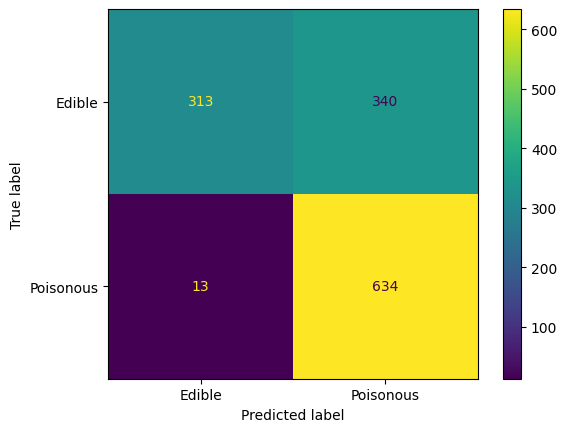

In [26]:
# MLP
#param = best_param_mlp

param = {'hidden_layer_sizes': (50,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0039983026106050435, 'batch_size': 128, 'learning_rate': 'adaptive', 'learning_rate_init': 0.00025696701812899785, 'max_iter': 1700, 'early_stopping': True}
model = MLPClassifier(**param, random_state=0)
model.fit(X_train, y_train)
# 1. Predict class probabilities
probabilities = model.predict_proba(X_test)[:, 1]

# 2. Decide on a threshold
threshold = 0.09  # You can adjust this value as needed

# 3. Apply the threshold
predictions_adjusted = [1 if prob > threshold else 0 for prob in probabilities]

# Now, evaluate the model using these adjusted predictions
recall_adjusted = recall_score(y_test, predictions_adjusted)
print(f'Adjusted Recall: {recall_adjusted}')

accuracy_adjusted = accuracy_score(y_test, predictions_adjusted)
print(f'Adjusted Accuracy: {accuracy_adjusted}')



cm = confusion_matrix(y_test, predictions_adjusted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=['Edible', 'Poisonous'])
disp.plot()

plt.show()

# Submit

In [ ]:
X_transformed = cat_pipe.transform(X)

In [ ]:
model.fit(X_transformed,y)

XGBClassifier(alpha=0.016590787827813775, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.13415069125873025, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0.026165152582744176,
              learning_rate=0.4873483174654276, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None, ...)

In [ ]:
columns_order = ['cap.shape', 'cap.color', 'bruises', 'stalk.color.above.ring', 'stalk.color.below.ring', 'population']
test0 = test0[columns_order]
test0

,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population
0,f,w,True,w,w,v
1,f,g,False,n,p,v
2,x,n,True,w,p,v
3,f,n,False,w,w,s
4,x,y,False,n,p,v
...,...,...,...,...,...,...
1620,x,n,False,w,y,v
1621,x,e,True,p,g,v
1622,x,y,False,b,n,y
1623,x,w,True,w,w,n


In [ ]:
test_transformed = cat_pipe.transform(test0)

In [ ]:
probabilities_test = model.predict_proba(test_transformed)[:, 1]
threshold = 0.035  # Or any other value based on your previous experiments
predictions_test = [1 if prob > threshold else 0 for prob in probabilities_test]
predictions_test

[1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,


In [ ]:
submission_file = pd.DataFrame({
    'Id':test_id,
    'poisonous': predictions_test
})

In [ ]:
submission_file.head()

,Id,poisonous
0,5165,1
1,4281,1
2,231,0
3,3890,0
4,1521,1


In [ ]:
submission_file.to_csv('/Users/merlesteffen/Documents/GitHub/MushroomClassification/Data/submissions/submission_merle_12.csv',index=False)